In [1]:
import pandas as pd

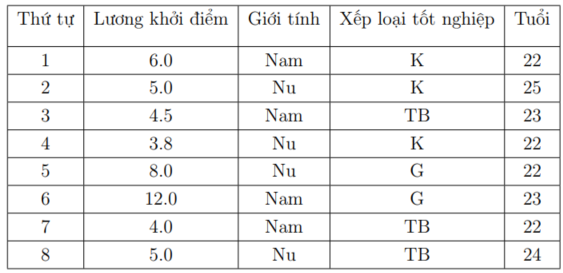

Nhập dữ liệu vào một data frame (đặt tên là sinh_vien) gồm các cột TT, luong,

gioi_tinh, tot_nghiep, tuoi

In [30]:
data = {
    'ThuTu' : [1, 2, 3, 4, 5, 6, 7, 8],
    'LuongKhoiDiem': [6, 5, 4.5 ,3.8 ,8 ,12, 4, 5],
    'GioiTinh' : ['Nam', 'Nu', 'Nam', 'Nu', 'Nu', 'Nam', 'Nam', 'Nu'],
    'LoaiTotNghiep' : ['K', 'K', 'TB', 'K', 'G', 'G', 'TB', 'TB'],
    'Tuoi' : [22, 25, 23, 22, 22, 23, 22, 24]
}

sinh_vien = pd.DataFrame(data)

print(sinh_vien)

0     6.0
1     5.0
2     4.5
3     3.8
4     8.0
5    12.0
6     4.0
7     5.0
Name: LuongKhoiDiem, dtype: float64


Đưa ra dữ liệu về những sinh viên nữ.

In [25]:
sinh_vien_nu = sinh_vien.query('GioiTinh == "Nu"')
print(sinh_vien_nu)

   ThuTu  LuongKhoiDiem GioiTinh LoaiTotNghiep  Tuoi
1      2            5.0       Nu             K    25
3      4            3.8       Nu             K    22
4      5            8.0       Nu             G    22
7      8            5.0       Nu            TB    24


Đưa ra dữ liệu về những sinh viên nam.

In [26]:
sinh_vien_nam = sinh_vien.query('GioiTinh == "Nam"')
print(sinh_vien_nam)

   ThuTu  LuongKhoiDiem GioiTinh LoaiTotNghiep  Tuoi
0      1            6.0      Nam             K    22
2      3            4.5      Nam            TB    23
5      6           12.0      Nam             G    23
6      7            4.0      Nam            TB    22


Đưa ra danh sách lương khởi điểm của nhóm sinh viên nữ

In [78]:
# Cách 1
# luong_nu = sinh_vien_nu['LuongKhoiDiem']
# print(luong_nu)

# Cách 2
luong_nu = sinh_vien[sinh_vien.GioiTinh == "Nu"]
print(luong_nu['LuongKhoiDiem'])

1    5.0
3    3.8
4    8.0
7    5.0
Name: LuongKhoiDiem, dtype: float64


Đưa ra danh sách tuổi của nhóm sinh viên nam

In [79]:
# Cách 1
# tuoi_nam = sinh_vien_nam['Tuoi']
# print(tuoi_nam)

# Cách 2
tuoi_nam = sinh_vien[sinh_vien.GioiTinh == "Nam"]
print(tuoi_nam['Tuoi'])

0    22
2    23
5    23
6    22
Name: Tuoi, dtype: object


Đưa ra danh sách những sinh viên có lương khởi điểm trên 6 triệu/tháng

In [41]:
luong_hon_6tr = sinh_vien.query('LuongKhoiDiem > 6')
print(luong_hon_6tr)

   ThuTu  LuongKhoiDiem GioiTinh LoaiTotNghiep  Tuoi
4      5            8.0       Nu             G    22
5      6           12.0      Nam             G    23


Cho biết các thông tin về những người có lương cao nhất trong danh sách

In [73]:
# Cách 1
luong_max = sinh_vien.LuongKhoiDiem.max()
print(luong_max)
info_luong_max = sinh_vien.query('LuongKhoiDiem == 12')
print(info_luong_max)

# Cách 2
luong_max = sinh_vien[sinh_vien.LuongKhoiDiem == 12]
print(luong_max)

   ThuTu  LuongKhoiDiem GioiTinh LoaiTotNghiep Tuoi  DiemKhoaLuan
5      6           12.0      Nam             G   23           9.5


Thêm vào danh sách một sinh viên nam tốt nghiệp xếp loại giỏi, lương khởi điểm

7.5 triệu nhưng không có thông tin về tuổi

In [69]:
thu_tu_max = sinh_vien.ThuTu.max()
print(thu_tu_max)
sinh_vien.loc[sinh_vien.shape[0]] = [thu_tu_max+1, 7.5, 'Nam', 'G', None]
print(sinh_vien)

8
   ThuTu  LuongKhoiDiem GioiTinh LoaiTotNghiep  Tuoi
0      1            6.0      Nam             K    22
1      2            5.0       Nu             K    25
2      3            4.5      Nam            TB    23
3      4            3.8       Nu             K    22
4      5            8.0       Nu             G    22
5      6           12.0      Nam             G    23
6      7            4.0      Nam            TB    22
7      8            5.0       Nu            TB    24
8      9            7.5      Nam             G  None


Thêm vào data frame trên một cột điểm khóa luận tốt nghiệp của các sinh viên

trên theo thứ tự như sau: 8, 7.5, 7, 7, 9, 9.5, 8, 8, 9.

In [70]:
diem_khoa_luan = [8, 7.5, 7, 7, 9, 9.5, 8, 8, 9]
sinh_vien.insert(5, "DiemKhoaLuan", diem_khoa_luan)
print(sinh_vien)

   ThuTu  LuongKhoiDiem GioiTinh LoaiTotNghiep  Tuoi  DiemKhoaLuan
0      1            6.0      Nam             K    22           8.0
1      2            5.0       Nu             K    25           7.5
2      3            4.5      Nam            TB    23           7.0
3      4            3.8       Nu             K    22           7.0
4      5            8.0       Nu             G    22           9.0
5      6           12.0      Nam             G    23           9.5
6      7            4.0      Nam            TB    22           8.0
7      8            5.0       Nu            TB    24           8.0
8      9            7.5      Nam             G  None           9.0


Loại đi số liệu trống không trong data frame. Nhận xét

In [71]:
sinh_vien.dropna(inplace=True)
print(sinh_vien)

   ThuTu  LuongKhoiDiem GioiTinh LoaiTotNghiep Tuoi  DiemKhoaLuan
0      1            6.0      Nam             K   22           8.0
1      2            5.0       Nu             K   25           7.5
2      3            4.5      Nam            TB   23           7.0
3      4            3.8       Nu             K   22           7.0
4      5            8.0       Nu             G   22           9.0
5      6           12.0      Nam             G   23           9.5
6      7            4.0      Nam            TB   22           8.0
7      8            5.0       Nu            TB   24           8.0
